In [35]:
# To Stop GPUs working

In [36]:
# from numba import cuda
# cuda.select_device(0)
# cuda.close()

# Libraries

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import glob
import PIL # pillow - image processing
import tensorflow as tf
from PIL import Image
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import matplotlib
import matplotlib.pyplot as plt

tf.random.set_seed(123)

In [38]:
import os
#os.chdir(r"D:\PhD Classes (Big_files)\Neural Networks\Neural Networks\Project\2nd_dataset_image\Cropped_1Channel_Mask")
#os.chdir(r'/home/said.mejia/Projects/Deep_Learning/Dataset')
print(os.path.dirname(os.getcwd()))

C:\Users\said_\Google Drive\THE CITY COLLEGE OF NEW YORK\Ph.D.Classes\Spring21\Neural Networks\Project\Repo_CCNY_4\final-project-landandbuildingsatimg-ccny\notebooks


In [39]:
import sys
sys.path
sys.path.append(r'../../src/')

In [40]:
from visualization import visualize

In [41]:
from models.keras_segmentation.models.unet import vgg_unet
# from models.image_segmentation.keras_segmentation.models.unet import resnet50_unet
# from models.image_segmentation.keras_segmentation.models.segnet import vgg_segnet
# from models.image_segmentation.keras_segmentation.models.segnet import resnet50_segnet

# PLEASE READ LINE BELLOW

### Before use this notebook, please create a folder in githubfolder/models/Save_Models or run the following commented line

In [42]:
folder_name = 'Save_trial1'
os.mkdir(r'../../models/'f'{folder_name}')

FileExistsError: [WinError 183] Cannot create a file when that file already exists: '../../models/Save_trial1'

# Reading Images and Masks

In [ ]:
reading_images = (glob.glob(r'../../data/processed/Cropped_same_name/test/Images/*.png'))
reading_masks = (glob.glob(r'../../data/processed/Cropped_same_name/test/Masks/*.png'))
# reading_weights = (glob.glob(r'../../data/processed/Cropped_same_name/train/Sample_Weights/*.npy'))
img_num = 9

In [ ]:
img = PIL.Image.open(reading_images[img_num], 'r')
mask = PIL.Image.open(reading_masks[img_num], 'r')

In [ ]:
plt.imshow(np.asarray(img))

In [ ]:
plt.imshow(np.asarray(mask))

# GPU

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only use the first GPU
  try:
    tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")    
  except RuntimeError as e:
    # Visible devices must be set before GPUs have been initialized
    print(e)
    
tf.config.set_soft_device_placement(True)

# History Function

In [ ]:
def plot_history(history):
       
    acc = history.history['iou_score']
    val_acc = history.history['val_iou_score']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(acc)
    plt.plot(val_acc)
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    
    plt.subplot(1, 2, 2)
    plt.plot(loss)
    plt.plot(val_loss)
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    
    plt.show();

## Ploting the class labels

In [ ]:
labels = pd.read_csv('../../data/processed/Cropped_same_name/class_dict.csv')
classes = list(labels['name'])
classes

In [ ]:
labels = classes
col_dict = {0: 'blue', 1: 'red', 2: 'orange', 3: 'green', 
           4: 'yellow', 5: 'purple', 6: 'grey', }
col_dict

# Paths

In [ ]:
weight_path= ['Model_Best_Weights_vgg_unet.hdf5',
             'Model_Best_Weights_resnet50_unet.hdf5',
             'Model_Best_Weights_vgg_segnet.hdf5',
             'Model_Best_Weights_resnet50_segnet.hdf5']
save_path= ['Model_Save_Model_vgg_unet.h5',
             'Model_Save_Model_resnet50_unet.h5',
             'Model_Save_Model_vgg_segnet.h5',
             'Model_Save_Model_resnet50_segnet.h5']
image_path= ['Model_vgg_unet.png',
             'Model_resnet50_unet.png',
             'Model_vgg_segnet.png',
             'Model_resnet50_segnet.png']

# 0. VGG_UNET

In [ ]:
i = 0

In [ ]:
callbacks = [
    ModelCheckpoint(
                filepath= '../../models/'f'{folder_name}''/' + weight_path[i],
                        save_best_only=True,
                        verbose=1, mode = 'max'), 
    EarlyStopping(patience=10,
                           restore_best_weights=True,
                           mode='max'),
    ReduceLROnPlateau()
]

In [ ]:
model = vgg_unet(n_classes=7 , input_height=512, input_width=512)

In [ ]:
from datetime import datetime
start = datetime.now()
total_loss, optim, metrics,  train_gen,  steps_per_epoch, val_gen, val_steps_per_epoch, epochs, callbacks, gen_use_multiprocessing, initial_epoch = model.train(
    input_height = 612,
    input_width = 612,
    LR=0.0001,
    verify_dataset = False,
#     train_images =  "../../data/processed/Cropped_same_name/train/Images/",
#     train_annotations = "../../data/processed/Cropped_same_name/train/Masks/",
    train_images =  "../../data/processed/Cropped_same_name/train/Images/",
    train_annotations = "../../data/processed/Cropped_same_name/train/Masks/",
    validate= True,
    val_images =  "../../data/processed/Cropped_same_name/val/Images/",
    val_annotations = "../../data/processed/Cropped_same_name/val/Masks/",
#     val_images =  "../../data/processed/Cropped_same_name/val/Images/",
#     val_annotations = "../../data/processed/Cropped_same_name/val/Masks/",
    epochs=1, 
    callbacks = callbacks,
    other_inputs_paths = ["D:/PhD Classes (Big_files)/Neural Networks/Neural Networks/Project/2nd_dataset_image/Cropped_same_name/train/Sample_Weights/"]
#      other_inputs_paths = ["../../data/processed/Cropped_same_name/train/Sample_Weights/"]
)
end = datetime.now()
print("\nTime Taken for testing: %s" % (end-start))

In [ ]:
# # Create a MirroredStrategy.
# strategy = tf.distribute.MirroredStrategy()
# print('Number of devices: {}'.format(strategy.num_replicas_in_sync))

# # Open a strategy scope.
# with strategy.scope():
#   # Everything that creates variables should be under the strategy scope.
#   # In general this is only model construction & `compile()`.
#     model = vgg_unet(n_classes=7 , input_height=512, input_width=512)
#     #model.summary()
#     model.compile(loss=total_loss, optimizer= optim, metrics= metrics)

In [ ]:
# model = vgg_unet(n_classes=7 , input_height=512, input_width=512)
#model.summary()
model.compile(loss=total_loss, optimizer= optim, metrics= metrics)

In [26]:
nn_model = model.fit(train_gen,
                  steps_per_epoch=steps_per_epoch,
                  validation_data=val_gen,
                  validation_steps=val_steps_per_epoch,
                  epochs=epochs, callbacks=callbacks,
                  use_multiprocessing=gen_use_multiprocessing, initial_epoch=initial_epoch) #, sample_weight = sample_weight)

Epoch 1/1
512/512 [==============================] - 225s 440ms/step - loss: 0.5044 - iou_score: 0.3778 - f1-score: 0.5221 - val_loss: 0.4235 - val_iou_score: 0.4635 - val_f1-score: 0.6050

Epoch 00001: val_loss improved from -inf to 0.42350, saving model to ../../models/Save_trial1/Model_Best_Weights_vgg_unet.hdf5


OSError: Unable to create file (unable to open file: name = '../../models/Save_trial1/Model_Best_Weights_vgg_unet.hdf5', errno = 2, error message = 'No such file or directory', flags = 13, o_flags = 302)

## Saving the model

In [ ]:
nn_model.save('../../models/'f'{folder_name}''/' + save_path[i])

In [ ]:
plot_history(model_0_hist)

In [ ]:
out = nn_model.predict_segmentation(
    inp= reading_images[img_num],
    out_fname= '../../models/'f'{folder_name}''/' + image_path[i]
)

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(16, 6))

axes[0].imshow(np.asarray(img))
axes[1] = visualize.plot_label(np.asarray(mask), labels,col_dict, axes[1], fig, colorbar = False)
axes[2] = visualize.plot_label(np.asarray(out), labels,col_dict, axes[2], fig, colorbar = True)

NameError: name 'labels' is not defined

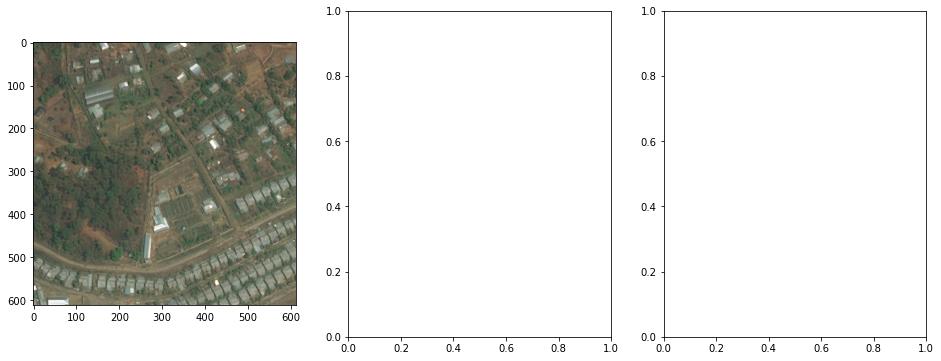

In [27]:
fig, axes = plt.subplots(1, 3, figsize=(16, 6))
# fig.subplots_adjust(hspace=0.1)
axes[0].imshow(np.asarray(img))
axes[1] = plot_label(np.asarray(mask), labels,col_dict, axes[1], fig, colorbar = False)
axes[2] = plot_label_plot(np.asarray(out), labels,col_dict, axes[2], fig, colorbar = True)